# the Sparks Foundation

# TASK-3 "Exploratory Data Analysis"

**‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

# Author - Vishesh Garg

In [1]:
#impoting required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading dataset

df = pd.read_csv('SampleSuperstore.csv')
print(df.head())

        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.871

In [3]:
#droping some Columns

df=df.drop(columns = ['Ship Mode','Segment'])
df.head()

,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 11)

In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       9994 non-null   object 
 1   City          9994 non-null   object 
 2   State         9994 non-null   object 
 3   Postal Code   9994 non-null   int64  
 4   Region        9994 non-null   object 
 5   Category      9994 non-null   object 
 6   Sub-Category  9994 non-null   object 
 7   Sales         9994 non-null   float64
 8   Quantity      9994 non-null   int64  
 9   Discount      9994 non-null   float64
 10  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 859.0+ KB


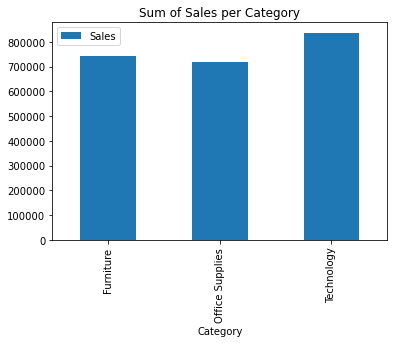

In [7]:
#ploting Graph Category vs Sales

df.groupby(by=["Category"])[["Sales"]].sum().plot.bar(width = 0.5)
plt.title('Sum of Sales per Category')
plt.show()

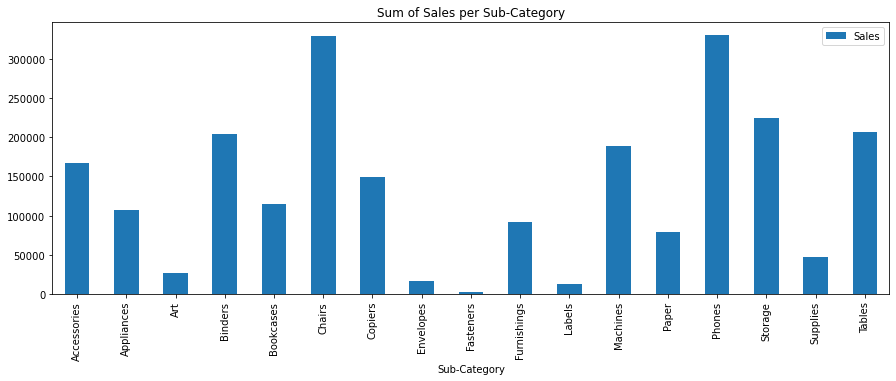

In [8]:
##ploting Graph Sub-Category vs Sales

df.groupby(by=["Sub-Category"])[["Sales"]].sum().plot.bar()
plt.gcf().set_size_inches(15, 5)
plt.title('Sum of Sales per Sub-Category')
plt.show()

In [9]:
df['SP'] = (df['Sales']*df['Quantity'])-df['Discount']
df['CP'] = df['SP']-df['Profit']
df['Profit%'] = (df['Profit']/df['CP']) * 100
df.head(10) #print Starting 10 values

,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,SP,CP,Profit%
0,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,523.9200,482.0064,8.695652
1,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,2195.8200,1976.2380,11.111111
2,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,29.2400,22.3686,30.718954
3,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,4787.4375,5170.4685,-7.408052
4,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,44.5360,42.0196,5.988634
5,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694,342.0200,327.8506,4.321908
6,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656,29.1200,27.1544,7.238606
7,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152,5442.7120,5351.9968,1.694979
8,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825,55.3120,49.5295,11.674860
9,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700,574.5000,540.0300,6.382979


Text(0, 0.5, 'Total Sales')

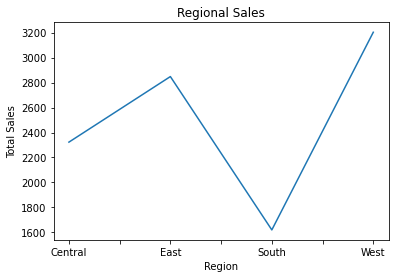

In [10]:
#Plotting Graph Region vs Sales

sales_by_Region = df.groupby('Region').size()

plot_by_Region = sales_by_Region.plot(title='Regional Sales')
plot_by_Region.set_xlabel('Region')
plot_by_Region.set_ylabel('Total Sales')

Text(0, 0.5, 'Total Sales')

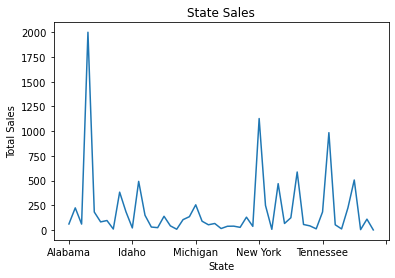

In [11]:
#Plotting Graph States vs Sales

sales_by_State = df.groupby('State').size()
plot_by_State = sales_by_State.plot(title='State Sales')
plot_by_State.set_xlabel('State')
plot_by_State.set_ylabel('Total Sales')

Text(0, 0.5, 'Total Sales')

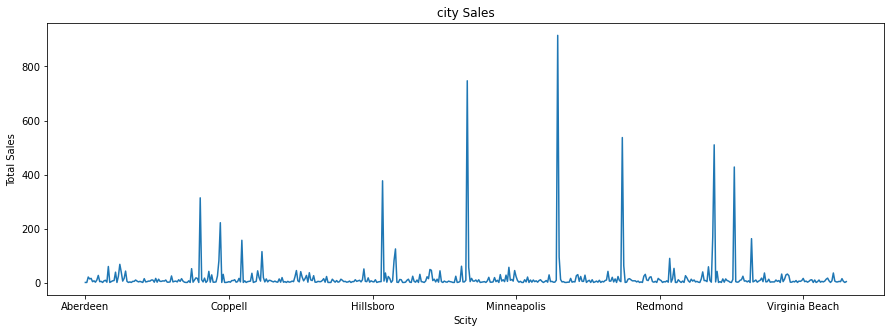

In [12]:
#Plotting Graph city vs Sales

sales_by_city = df.groupby('City').size()
plt.gcf().set_size_inches(15, 5)
plot_by_city = sales_by_city.plot(title='city Sales')
plot_by_city.set_xlabel('Scity')
plot_by_city.set_ylabel('Total Sales')